# ML App to Forecast the Stock Market

## Introduction:

This project aims to develop a system that examines and tries to forecast the stock market. Stock markets are an interesting entity where the price movement or behaviour at certain times can be attributed to events that occur around the world, which in turns influences the buyers and sellers. Other example that influences the market can be the year-end tax loss sales. This is when traders sell their losses at the end of the year due to the nature of tax laws, leading to a downward price movement. However, when this event/phenomenon has been broadcast, traders then attempts to get ahead of the curve by buying these stocks in late December and selling them to expecting buyers in January. Becasue of this, the effect on the market will then be diluted. Overall it can be said that the price movement are largely influenced by the buyers and sellers themselves and their mentality behind each move. The system will attempt to build and test a trading strategy. 

## Dataset:

Data will be from the S&P 500 avaible from the last few years. The pandas package also allows for stock price data to be obtained, from Yahoo! or Google.

## Breakdown of this Project:

- Exploring the types of market analysis
- Stock Market Research
- Develop a trading System


# 1 Exploring the types of market analysis:

There are many financial instruments such as stocks, bonds, ETFs, FOREX and swaps, however, for this project, it will be limited to stocks and the stock market.

Stock: 
- Is a fractional share of ownership in a public listed company. The stock price is the price for every share.

There are also two types of investors, where the first is the fundamental analyst and the second is the technical anayst.

Fundamental analyst:
- These analyst investigates the company's financials looking for information that indicates if the market is undervaluing the shares. The factors innvestigated are revenue, earnings and cash flow, or types of ratios. Valuation of these comapanies are ususally compared to another.

Technical Analyst:
- Have a different approach where the analyst believes that the share prices reflects publicaly available infromation. They investigate historical prices (price rise, fall or stagnate) and its movements through time, where it may reveal clues regarding investor psychology.

# 2 Stock Market Research:

There are three forms mentioned in the efficient market hypothesis and these are called a weak form, a semi-strong form and a strong form. 

- The Weak Form: is where the market is considered efficient enough that the past information of prices cannot be used to predict future prices. This means that the information is reflected in stocks quickly making technical analysis ineffective and where in somoe scenarios, only fundamental analysis would be effective.

- The Semi-strong Form: is where the prices can be seen to immediately reflect relevant new public information circulating. This means that both the technical analysis and fundamental analysis would be ineffective.

- The Strong Form: is where the stock prices does reflect all public and private infromation. 

Overall, the market can be considered to be largely efficient in terms of its operations, However, often the money making opportunities occur when or during distinct intervals of market inefficiency. Such events can sometimes be detected by momentum strategies.

## 2.1 Momentum Strategies:

Momentum strategies can be summed up as stocks are ranked from the highest down to the lowest according to its return over a prior period. It has been suggested that people then to underreact to news during the short tem and proceed to overreact to news in the long term. This translate to investors failing to increase the prices sufficiently when the stocks are reacting to exceptionally good news and that it takes time for the investors to come around. This tendency can be called the anchoring effect.

# 3 Import the required Libraries:

In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data, wb
import datetime as datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_colwidth', 200)

# 4 Get the Data from source:

The data here would be obtained from 'SPY' ETF and these represents the stocks of the S&P 500. The data pulled would also be set to start from the year 2010 until December of 2019.

## 4.1 Import the required library:

In [4]:
import pandas_datareader as pdr

In [5]:
# Datetime format here: YYYY-MM-DD
start_date = pd.to_datetime('2010-01-01')
stop_date = pd.to_datetime('2019-12-01')

In [31]:
spy = pdr.data.get_data_yahoo('SPY', start_date, stop_date)
spy

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,112.800003,111.389999,112.769997,111.440002,90637900.0,91.241043
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,92.788483
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,93.034081
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,93.099579
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,93.492622
...,...,...,...,...,...,...
2019-11-22,311.239990,309.850006,311.089996,310.959991,44850200.0,309.438629
2019-11-25,313.369995,311.980011,311.980011,313.369995,48647200.0,311.836853
2019-11-26,314.279999,313.059998,313.410004,314.079987,37569000.0,312.543365


In [32]:
type(spy)

pandas.core.frame.DataFrame

## 4.2 Plot the Price data: 

As it can be seen from the table above, there are several columns of price data (High, Low, Open and Close), including the Volume and Adj Close. The following plot only uses the __Closing price__, and should see a price chart of the daily closing price of the S&P 500 during the selected period.

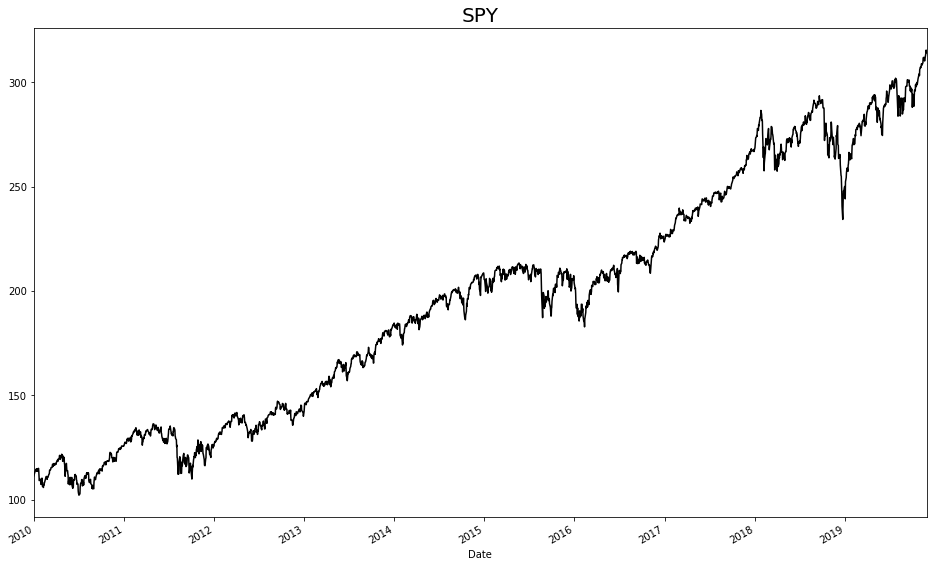

In [33]:
# Data to plot:
price_close = spy['Close']

# Plot:
fig, ax = plt.subplots(figsize = (16, 10))
price_close.plot(color = 'k')
plt.title("SPY", fontsize = 20);

## 4.3 Plot with OHLC candlesticks:

Luckily, the library called Plotly is available and open-source for ploting amazing graphs in python. One of these graphs allows for a dashboard style of plotting and makes it very intuitive. There is even an option to plot candlesticks with volume.

To get this section of code to work, please follow the installation of the 'OFFLINE' mode. This is so that the notebook can render the plot.ly package plots.

NOTE: Plotly renderers are compatible with Chrome browser, Apple's Safari cannot be used.

Plotly Installation link: https://plot.ly/python/getting-started/#initialization-for-offline-plotting

Plotly Candlestick link: https://plot.ly/python/candlestick-charts/

In [57]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go

plotly.offline.init_notebook_mode(connected=True)

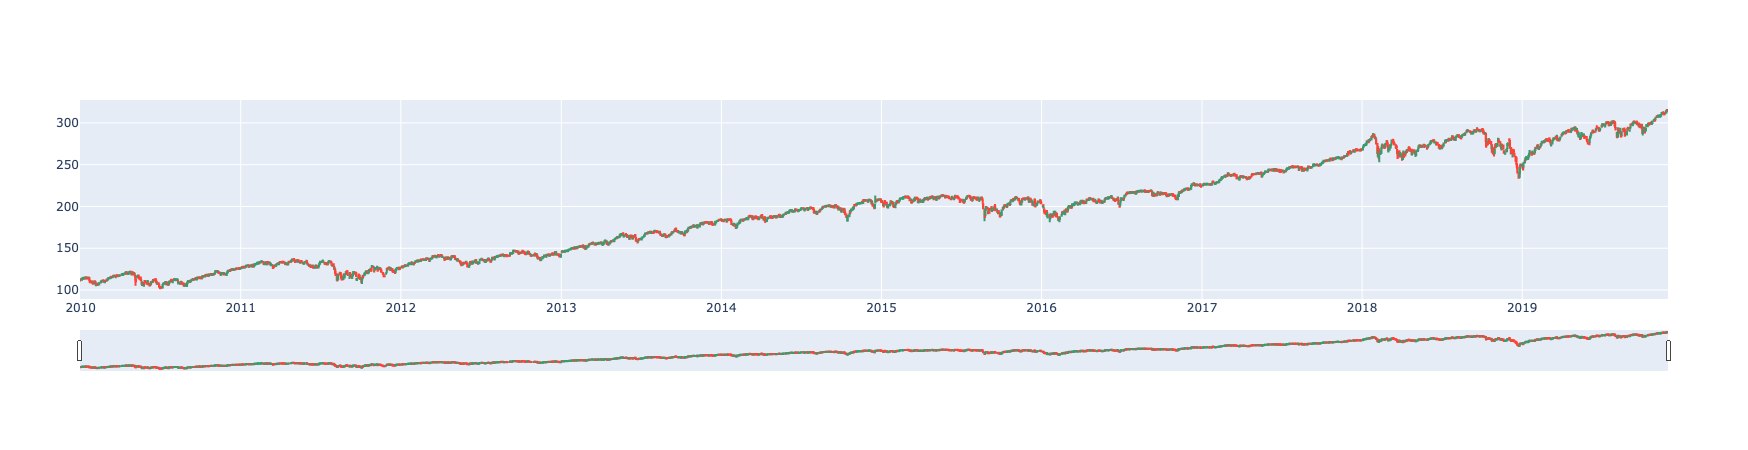

In [59]:
df = spy.copy()

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

# 5 Exploratory Data Analysis:

## 5.1 Check the amount of returns over this current period, if an investment in this EFT was made.